# Preprocessing

In [157]:
import numpy as np
import pandas as pd

In [158]:
bank_full = pd.read_csv('./datasets/bank-full.csv', sep=';')
# pd.read_csv()
bank = pd.read_csv('./datasets/bank.csv', sep=';')
bank_additional_full = pd.read_csv('./datasets/bank-additional-full.csv', sep=';')
bank_additional = pd.read_csv('./datasets/bank-additional.csv', sep=';')

In [159]:
bank_full.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [160]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [161]:
bank_additional_full.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [162]:
bank_additional.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [163]:
# Data yang dipakai untuk logistic regression adalah bank additional

# Mengecek data yang kosong
bank_additional_full.isna().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [164]:
# Mengecek data yang kosong
bank_additional.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [165]:
# Mengecek type data
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [166]:
# Mengecek tipe data
bank_additional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [167]:
# Membagi data menjadi data training (X, y) dan data test (X, y)
bank_additional_full_X = bank_additional_full.drop(columns='y')
bank_additional_full_y = bank_additional_full['y']
bank_additional_X = bank_additional.drop(columns='y')
bank_additional_y = bank_additional['y']

bank_full_X = bank_full.drop(columns='y')
bank_full_y = bank_full['y']
bank_X = bank.drop(columns='y')
bank_y = bank['y']

"""
Alasannya adalah 
bank_additional_full adalah suatu data full dan
bank_additional adalah suatu data 10%-nya, jadi 
asumsikan bank_additional_full adalah train dan bank_additional adalah test
"""

'\nAlasannya adalah \nbank_additional_full adalah suatu data full dan\nbank_additional adalah suatu data 10%-nya, jadi \nasumsikan bank_additional_full adalah train dan bank_additional adalah test\n'

In [168]:
# Buat data dummies
bank_additional_full_X_dummies = pd.get_dummies(bank_additional_full_X)
bank_additional_X_dummies = pd.get_dummies(bank_additional_X)
bank_full_X_dummies = pd.get_dummies(bank_full_X)
bank_X_dummies = pd.get_dummies(bank_X)

In [169]:
# Cek dummies
bank_additional_full_X_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [170]:
bank_additional_full_X_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [171]:
# Cek y
bank_additional_y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

# Modeling

## Modeling Function

Kegunaannya adalah untuk membuat fungsi agar saat modeling tinggal dimasukkan ke sini. 
Alasannya untuk efisiensi dan step-nya pasti bakal berulang

In [172]:
def modeling_function(model, bankX = bank_additional_X_dummies, banky = bank_additional_y):
    # Buat hasil prediksi
    predicted = model.predict(bankX)
    print('Data Prediksi : ', predicted)
    
    # Pengecekan akurasi

    data = [
        skmet.accuracy_score(banky, predicted),
        skmet.precision_score(banky, predicted, pos_label='no'),
        skmet.precision_score(banky, predicted, pos_label='yes'),
        skmet.recall_score(banky, predicted,  pos_label='no'),
        skmet.recall_score(banky, predicted,  pos_label='yes'),
    ]

    labels = [
        'Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes'
    ]

    for x in range(5):
        print(labels[x], " : ", data[x])

    print('Confusion Matrix : \n', skmet.confusion_matrix(banky, predicted))
    
    # Buat visualisasi
    import matplotlib.pyplot as plt

    names = labels
    values = data

    plt.figure(figsize=(9, 3))
    plt.title('Check Some Information About Precision, Accuration, Recall')
    plt.xlabel('Calculation')
    plt.ylabel('Score')
    plt.bar(names, values)
    plt.show()
    
    return data


## Logistic Regression

In [173]:
# Buat Logistic Regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skmet
datas = []

C:\users\zhafran\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9147851420247632
Precision No  :  0.9317885967196042
Precision Yes  :  0.6798561151079137
Recall No  :  0.9757360959651036
Recall Yes  :  0.4190687361419069
Confusion Matrix : 
 [[3579   89]
 [ 262  189]]


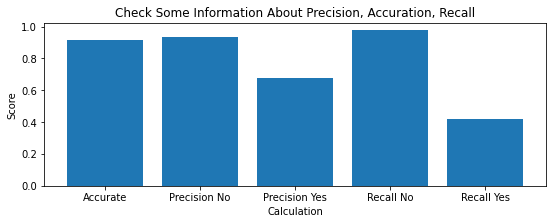

In [174]:
# Buat modelnya
model = LogisticRegression().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

## K-Nearest Neighbor

In [175]:
# Buat KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skmet

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9310512260257344
Precision No  :  0.9516817939135077
Precision Yes  :  0.7238605898123325
Recall No  :  0.9719193020719739
Recall Yes  :  0.5986696230598669
Confusion Matrix : 
 [[3565  103]
 [ 181  270]]


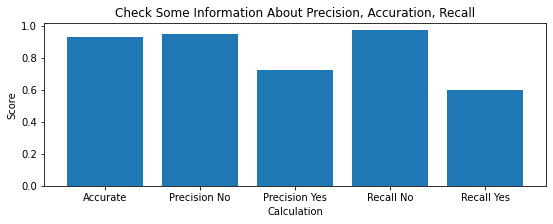

In [176]:
# Buat modelnya
model = KNeighborsClassifier().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

## Super Vector Machine

In [177]:
# Buat SVM
from sklearn import svm
import sklearn.metrics as skmet

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.8852023888520238
Precision No  :  0.8854928017718715
Precision Yes  :  0.6666666666666666
Recall No  :  0.9995
Recall Yes  :  0.007677543186180422
Confusion Matrix : 
 [[3998    2]
 [ 517    4]]


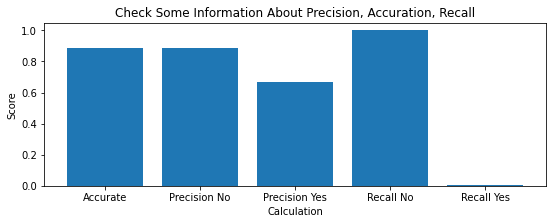

In [178]:
# Buat modelnya
"""
Untuk SVM, saya menggunakan data bank yang kolomnya lebih sedikit
"""
model = svm.SVC().fit(bank_full_X_dummies, bank_full_y)
datas.append(modeling_function(model, bank_X_dummies, bank_y))

## Decision Tree

In [179]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO # <-- direplace pakai ini  (xx from sklearn.externals.six import StringIO
from IPython.display import Image

**Decision Tree Classifier** memiliki memiliki beberapa hal yang ingin saya coba yaitu :
1. *Criterion Gini Split Best*
2. *Criterion Gini Split Random*
3. *Criterion Entropy Split Best*
4. *Criterion Entropy Split Random*

### Decision Tree Function

Fungsi ini digunakan untuk membuat model *decision tree* karena secara *code* pasti hampir mirip

In [180]:
def decision_tree_function(model):
    dot_data = StringIO()
    tree.export_graphviz(model,
                        out_file=dot_data,
                        class_names=['no', 'yes'], # the target names.
                        feature_names=bank_additional_full_X_dummies.columns, # the feature names.
                        filled=True, # Whether to fill in the boxes with colours.
                        rounded=True, # Whether to round the corners of the boxes.
                        special_characters=True,
                        max_depth=5
                        )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

### Decision Tree Criterion Gini Split Best

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9193979121145909
Precision No  :  0.9476650563607085
Precision Yes  :  0.6513994910941476
Recall No  :  0.962649945474373
Recall Yes  :  0.5676274944567627
Confusion Matrix : 
 [[3531  137]
 [ 195  256]]


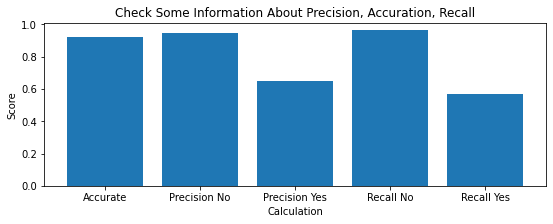

In [181]:
# Buat modelnya
model = DecisionTreeClassifier(max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt = []
data_dt.append(modeling_function(model))
# data_gb

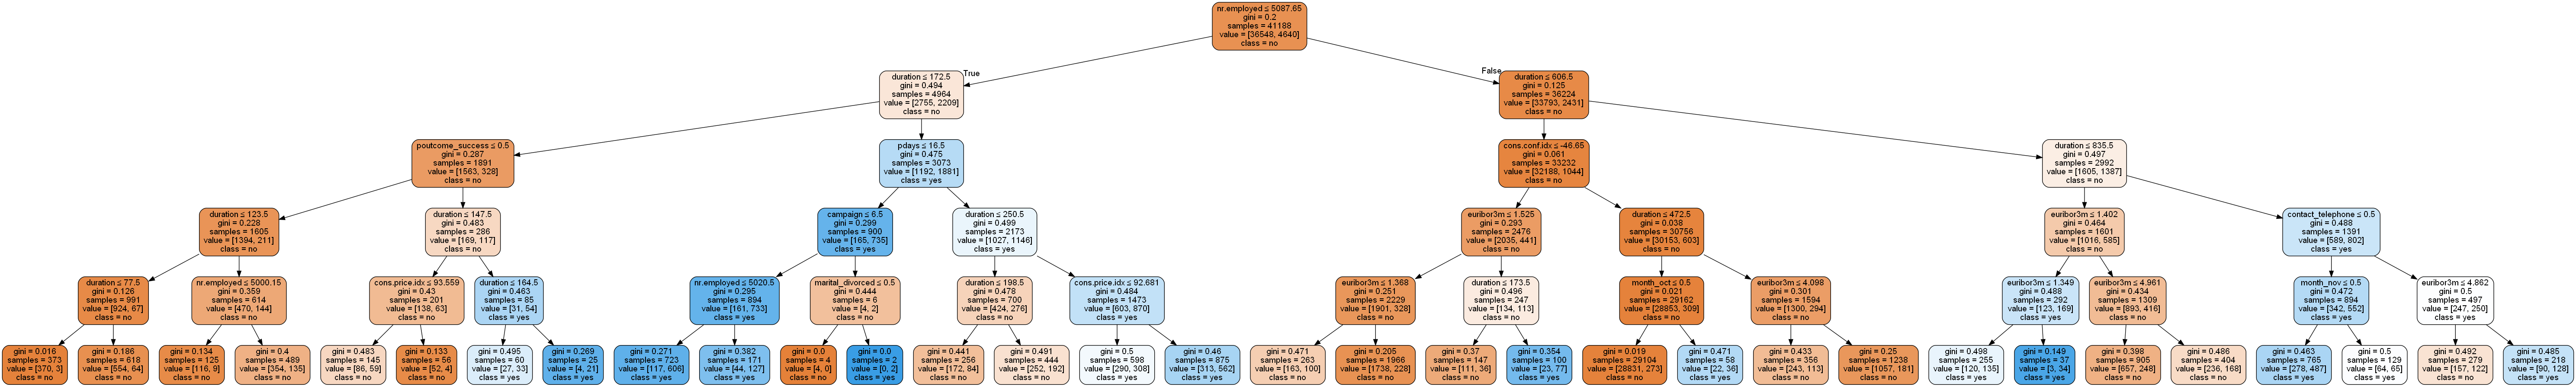

In [182]:
# Buat image decision tree
Image(decision_tree_function(model).create_png())

### Decision Tree Criterion Gini Split Random

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9130857004127215
Precision No  :  0.9305411030176899
Precision Yes  :  0.6690909090909091
Recall No  :  0.9751908396946565
Recall Yes  :  0.4079822616407982
Confusion Matrix : 
 [[3577   91]
 [ 267  184]]


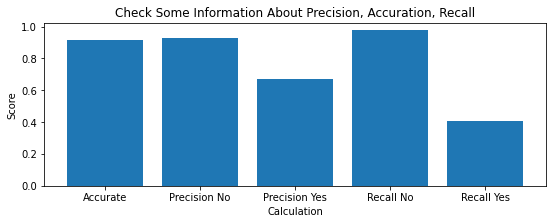

In [184]:
# Buat modelnya
model = DecisionTreeClassifier(splitter='random', max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

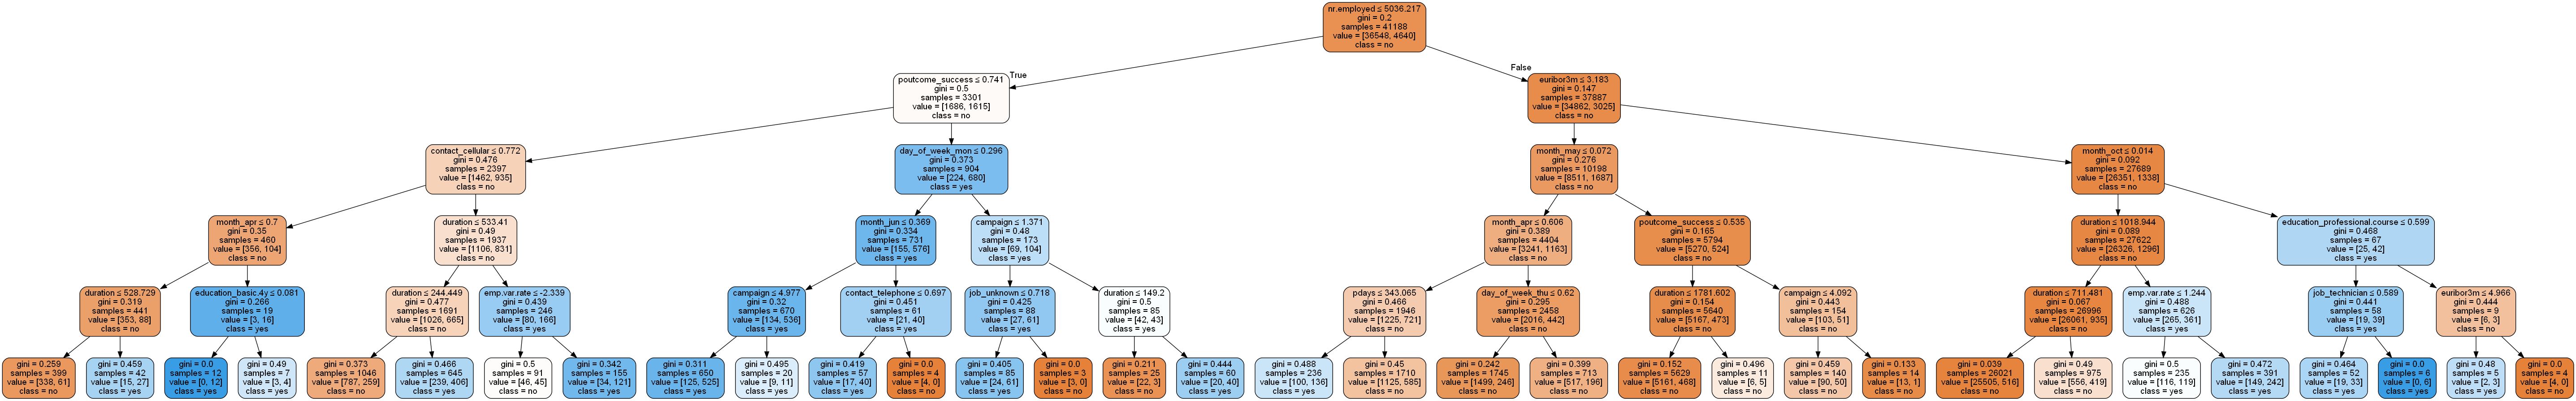

In [185]:
# Buat image decision tree
Image(decision_tree_function(model).create_png())

### Decision Tree Criterion Entropy Split Best

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9189123573682932
Precision No  :  0.9515167930660888
Precision Yes  :  0.6370023419203747
Recall No  :  0.957742639040349
Recall Yes  :  0.6031042128603105
Confusion Matrix : 
 [[3513  155]
 [ 179  272]]


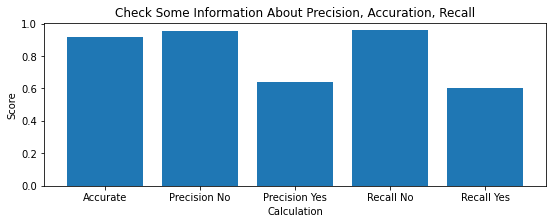

In [186]:
# Buat modelnya
model = DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

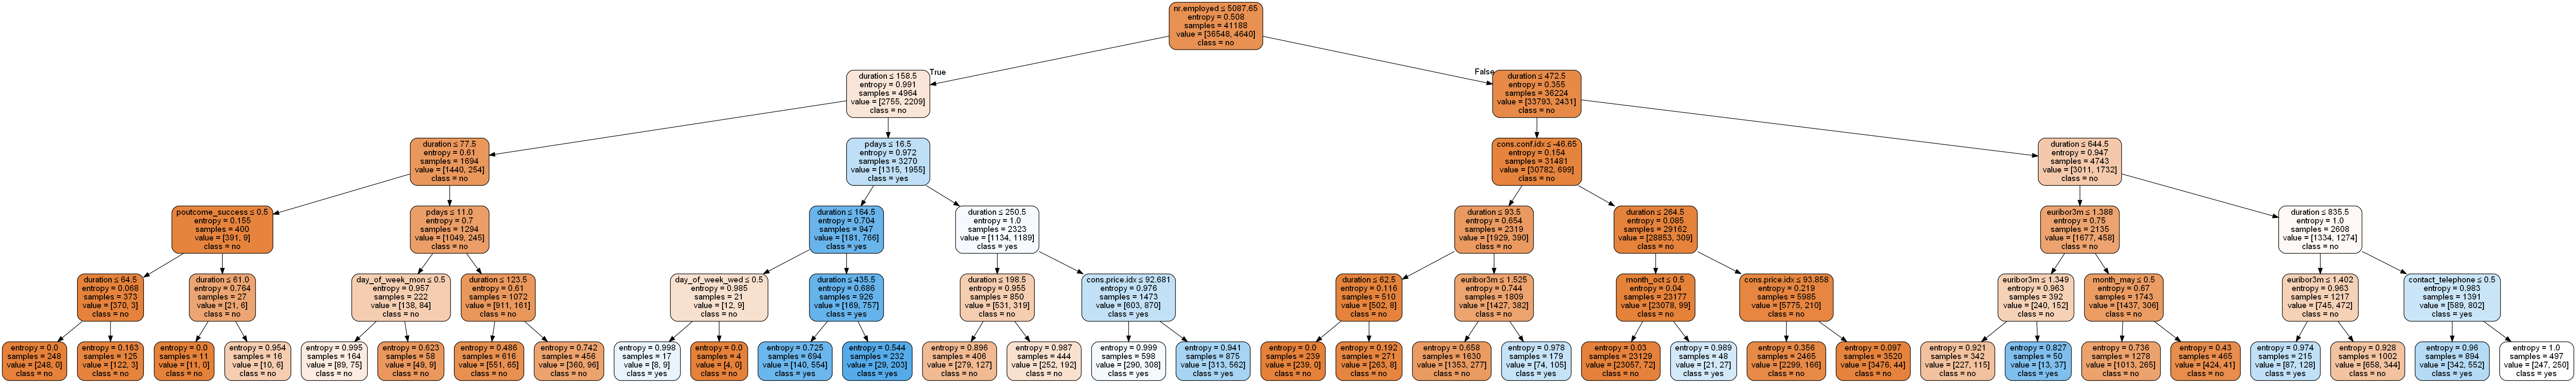

In [187]:
# Buat image decision tree
Image(decision_tree_function(model).create_png())

### Decision Tree Criterion Entropy Split Random

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9062879339645545
Precision No  :  0.9167089893346877
Precision Yes  :  0.6795580110497238
Recall No  :  0.9841875681570338
Recall Yes  :  0.2727272727272727
Confusion Matrix : 
 [[3610   58]
 [ 328  123]]


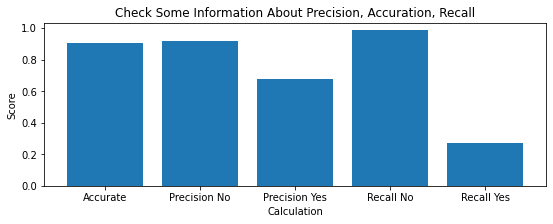

In [188]:
# Buat modelnya
model = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='random').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

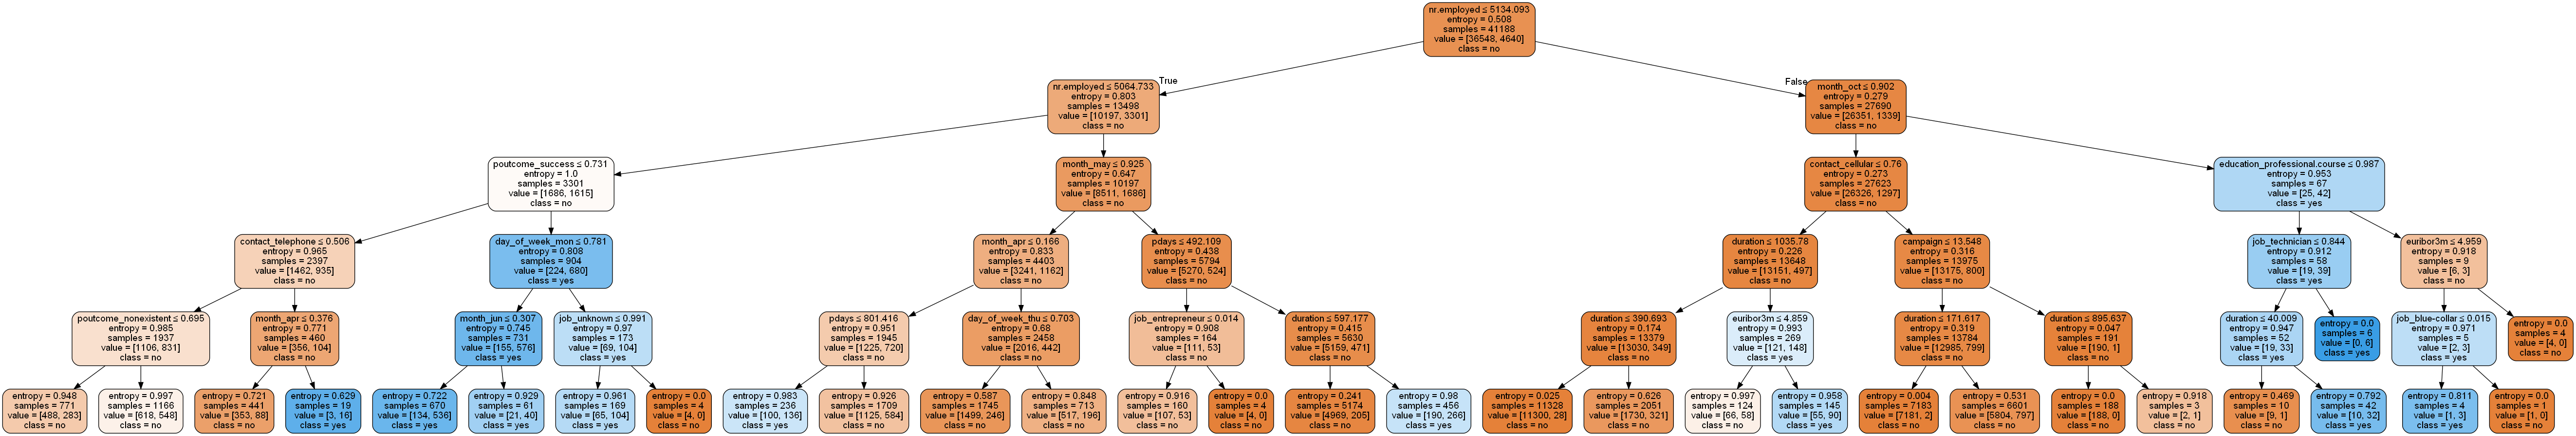

In [189]:
# Buat image decision tree
Image(decision_tree_function(model).create_png())

### Membandingkan Decision Tree Terbaik

In [190]:
# Kumpulin data ke data frame
dataset = {
    'Gini Best' : data_dt[0],
    'Gini Random' : data_dt[1],
    'Entropy Best' : data_dt[2],
    'Entropy Random' : data_dt[3],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
datas.append(df['Entropy Best'].values)
df.head()

,Gini Best,Gini Random,Entropy Best,Entropy Random
Labels,,,,
Accurate,0.919398,0.913086,0.918912,0.906288
Precision No,0.947665,0.930541,0.951517,0.916709
Precision Yes,0.651399,0.669091,0.637002,0.679558
Recall No,0.962650,0.975191,0.957743,0.984188
Recall Yes,0.567627,0.407982,0.603104,0.272727


Setelah melihat tabel di atas, dapat diketahui bahwa Entropy best adalah decision tree yang cocok dalam kasus kali ini jika kita memperhitungkan aspek 'Recall Yes'. 


## Random Forest

In [191]:
# Buat Random Forest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skmet
data_rf = []

### Random Forest Criterion Gini

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9050740470988103
Precision No  :  0.9095226193451638
Precision Yes  :  0.7542372881355932
Recall No  :  0.9920937840785169
Recall Yes  :  0.1973392461197339
Confusion Matrix : 
 [[3639   29]
 [ 362   89]]


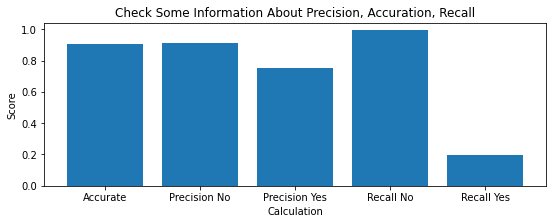

In [192]:
# Buat modelnya
model = RandomForestClassifier(max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_rf.append(modeling_function(model))

### Random Forest Criterion Entropy

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9048312697256615
Precision No  :  0.9088866699950074
Precision Yes  :  0.7610619469026548
Recall No  :  0.992639040348964
Recall Yes  :  0.19068736141906872
Confusion Matrix : 
 [[3641   27]
 [ 365   86]]


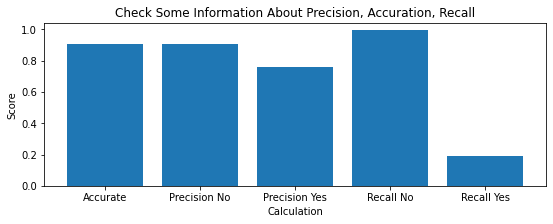

In [193]:
# Buat modelnya
model = RandomForestClassifier(max_depth=5, criterion='entropy').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_rf.append(modeling_function(model))

### Membandingkan Random Forest Terbaik

In [194]:
# Kumpulin data ke data frame
dataset = {
    'Gini' : data_rf[0],
    'Entropy' : data_rf[1],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
datas.append(df['Entropy'].values)
df.head()



,Gini,Entropy
Labels,,
Accurate,0.905074,0.904831
Precision No,0.909523,0.908887
Precision Yes,0.754237,0.761062
Recall No,0.992094,0.992639
Recall Yes,0.197339,0.190687


Setelah pemaparan data tersebut, telah didapatkan bahwa *Random Forest Criterion Entropy* lebih bagus untuk menyelesaikan kasus ini dibandingkan *Random Forest Criterion Gini* . Alasannya adalah semua pengukuran *Random Forest Criterion Entropy* telah di atas *Random Forest Criterion Gini* .

## Naive Bayes

In [195]:
# Buat SVM
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skmet

Data Prediksi :  ['no' 'no' 'no' ... 'yes' 'no' 'no']
Accurate  :  0.8652585579024035
Precision No  :  0.9395650946060435
Precision Yes  :  0.4100346020761246
Recall No  :  0.9070338058887677
Recall Yes  :  0.5254988913525499
Confusion Matrix : 
 [[3327  341]
 [ 214  237]]


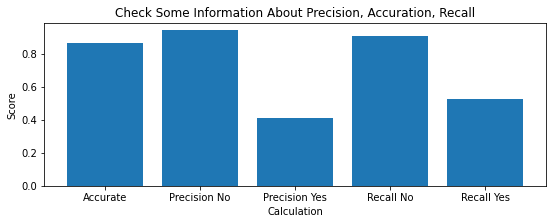

In [196]:
# Buat modelnya
model = GaussianNB().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

# Algoritma Terbaik untuk Kasus Ini

In [197]:
datas

[[0.9147851420247632,
  0.9317885967196042,
  0.6798561151079137,
  0.9757360959651036,
  0.4190687361419069],
 [0.9310512260257344,
  0.9516817939135077,
  0.7238605898123325,
  0.9719193020719739,
  0.5986696230598669],
 [0.8852023888520238,
  0.8854928017718715,
  0.6666666666666666,
  0.9995,
  0.007677543186180422],
 array([0.91891236, 0.95151679, 0.63700234, 0.95774264, 0.60310421]),
 array([0.90483127, 0.90888667, 0.76106195, 0.99263904, 0.19068736]),
 [0.8652585579024035,
  0.9395650946060435,
  0.4100346020761246,
  0.9070338058887677,
  0.5254988913525499]]

In [198]:
# Buat dataframe untuk melihat data dari accurate, precision, and recall
dataset = {
    'Logistic Regression' : datas[0],
    'KNN' : datas[1],
    'SVM' : datas[2],
    'Decision Tree' : datas[3],
    'Random Forest' : datas[4],
    'Naive Byes' : datas[5],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
df.head()

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Naive Byes
Labels,,,,,,
Accurate,0.914785,0.931051,0.885202,0.918912,0.904831,0.865259
Precision No,0.931789,0.951682,0.885493,0.951517,0.908887,0.939565
Precision Yes,0.679856,0.723861,0.666667,0.637002,0.761062,0.410035
Recall No,0.975736,0.971919,0.999500,0.957743,0.992639,0.907034
Recall Yes,0.419069,0.598670,0.007678,0.603104,0.190687,0.525499


In [219]:
df.iloc[[i]].index[0]

'Recall Yes'

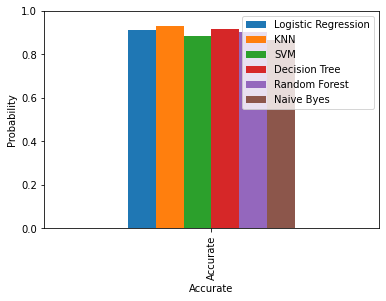

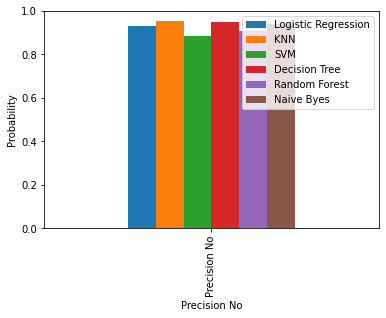

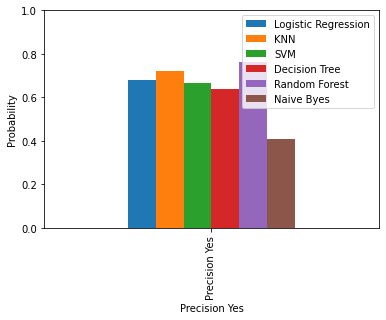

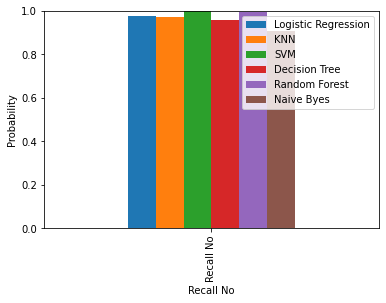

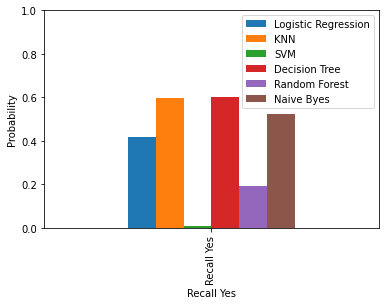

In [221]:

for i in range(5):
    df.iloc[[i]].plot.bar()
    plt.xlabel(df.iloc[[i]].index[0])
    plt.ylabel('Probability')
    plt.ylim(0, 1.0)
    plt.show()

Berdasarkan grafik di atas, hasilnya saya lebih memilih KNN sebagai algoritma terbaik dalam kasus ini karena probabilitas yang terbilang tinggi saat pengukuran akurasi, presisi, dan *recall*. 